# **Project Title: Cardiovascular Disease Prediction**

# Introduction to the Project

Cardiovascular disease (CVD) continues to be a primary source of morbidity and mortality globally, rendering early detection and prevention essential in healthcare. As health data becomes more accessible, machine learning algorithms have emerged as effective instruments for forecasting health hazards, such as the probability of getting cardiovascular diseases. This project utilises a logistic regression model to forecast the 10-year risk of coronary heart disease (CHD) in individuals, using diverse demographic and clinical variables. This initiative seeks to leverage predictive analytics to improve early diagnosis, guide treatment strategies, and eventually optimise patient outcomes.


# Project Overview

The Cardiovascular Disease Prediction project aims to create a predictive model for evaluating the risk of coronary heart disease, utilising a dataset that encompasses demographic parameters, medical history, and behavioural characteristics of patients. The project encompasses the subsequent essential steps:

Data Collection: A thorough dataset was compiled, encompassing pertinent attributes related to cardiovascular health. The dataset underwent exploratory data analysis to discern trends, patterns, and any abnormalities.

Data Preprocessing: To mitigate the issues of class imbalance present in the dataset, the SMOTE (Synthetic Minority Over-sampling Technique) method was utilised. This guaranteed an equitable representation of patients with and without CHD for model training.

A logistic regression model was constructed to forecast the 10-year risk of coronary heart disease (CHD). The model's performance was assessed using multiple measures, such as accuracy, precision, recall, F1 score, and ROC AUC score, with an emphasis on optimising the decision threshold for enhanced predictive performance.

Assessment and Refinement: An appropriate threshold for classification was established to improve the model's predictive efficacy. A range of performance indicators was evaluated to confirm that the model satisfies clinical requirements for precise prediction while reducing false negatives and false positives.

Insights and Recommendations: The findings were analysed to yield insights on the model's efficacy, and suggestions were proposed for prospective improvements and clinical implementations.

Data source: https://www.kaggle.com/datasets/christofel04/cardiovascular-study-dataset-predict-heart-disea/data


# **Import Libracies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report
import warnings
warnings.filterwarnings('ignore')

# **Data Loading**

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Question 1/train.csv',index_col= 0)
data.head(5)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


To gain more insight about the datset, the following information were gathered.

1. Number of features
2. Number of sample
3. Number and labels (categories) of categorical variables
4. Number of numeric features
5. Range, Mean, Q1, Q2, Q3, Standard Deviation for all the numeric variables in the dataset (to be calculated and reported separately for each numeric variable)

# **Data Insights**

In [3]:
data.shape

(3390, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


In [5]:
data.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

,0
age,0
education,87
sex,0
is_smoking,0
cigsPerDay,22
BPMeds,44
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,38


In [8]:
v = data.isna().any(axis=1).sum()
nan = (v/len(data))*100
print(f'The NAN value within the data is {v} with a percentage of {nan:.2f}% of the entire data')

The NAN value within the data is 463 with a percentage of 13.66% of the entire data


Looking at the percentage of the NAN value it is 13.66% of the entire data,so i decide to to fill the nan value with the mean of their columnn

Filling up null values

In [9]:
data['glucose'] = data['glucose'].fillna(data['glucose'].median())
data['cigsPerDay'] = data['cigsPerDay'].fillna(data['cigsPerDay'].median())
data['totChol'] = data['totChol'].fillna(data['totChol'].median())
data['BMI'] = data['BMI'].fillna(data['BMI'].median())
data['heartRate'] = data['heartRate'].fillna(data['heartRate'].median())
data['BPMeds'] = data['BPMeds'].fillna(data['BPMeds'].mode()[0])

Deleting the education column

In [10]:
data = data.drop(columns = ['education'])

Verifying the neccessary features

In [11]:
depent = data['TenYearCHD'].value_counts()
label = depent.index
value = depent.values
depent

,count
TenYearCHD,
0,2879
1,511


The TenYearCHD column has imbalanced data which is the major issue I have to conider why working on this dataset

In [12]:
data['sex'].value_counts()

,count
sex,
F,1923
M,1467


In [13]:
data['is_smoking'].value_counts()

,count
is_smoking,
NO,1703
YES,1687


In [14]:
data.isnull().sum()

,0
age,0
sex,0
is_smoking,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0
sysBP,0


# **Data Visualization**

# **Numeric Features**

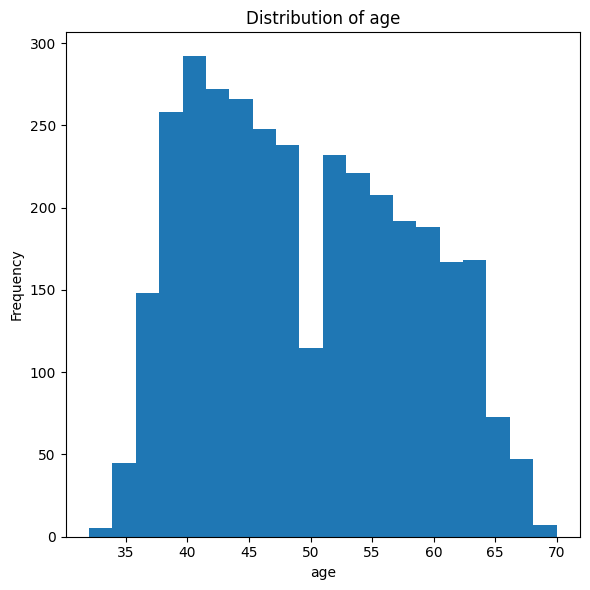

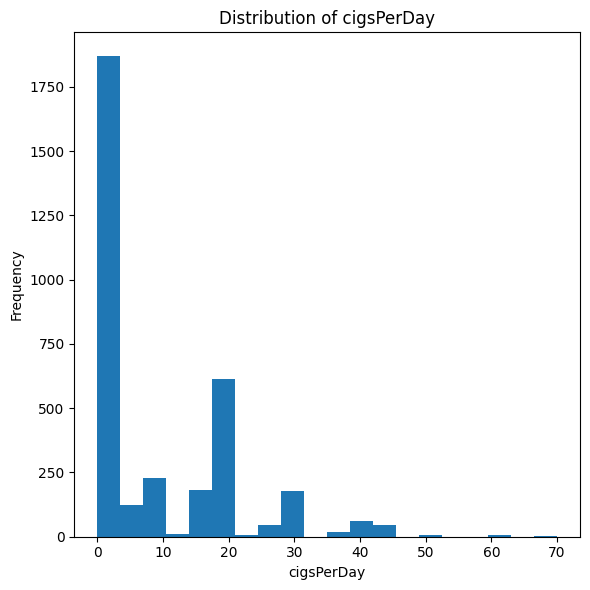

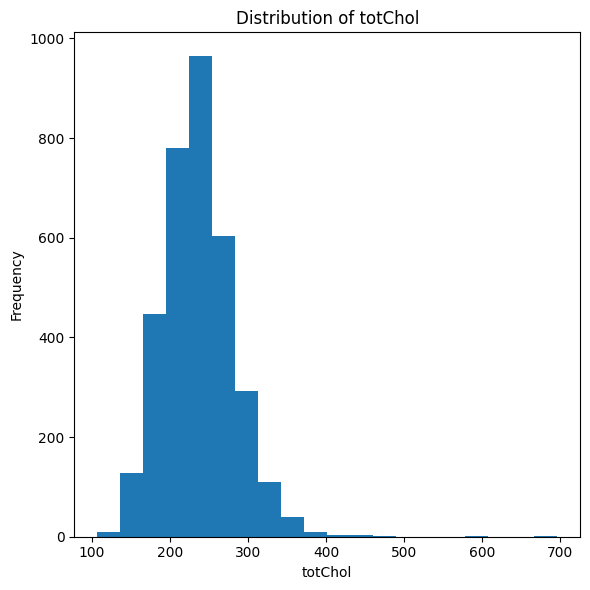

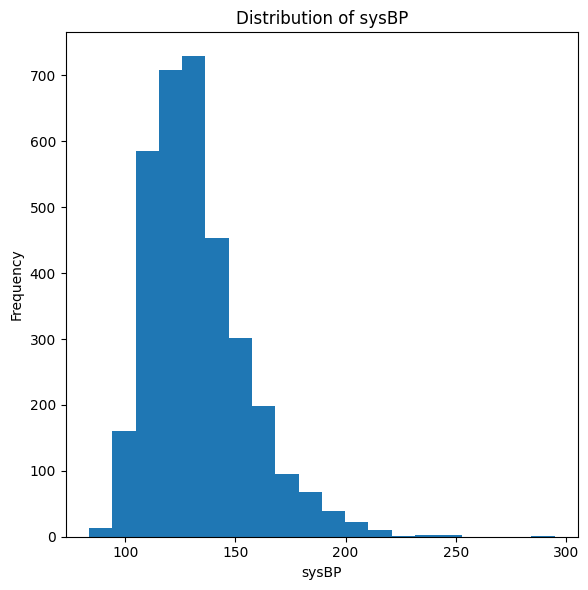

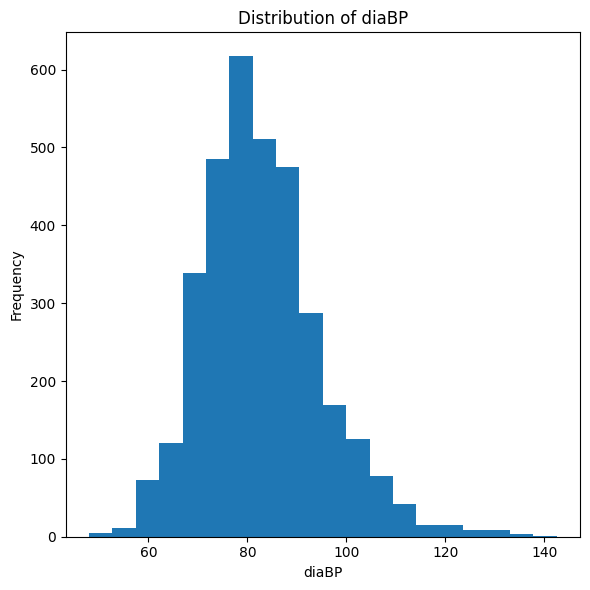

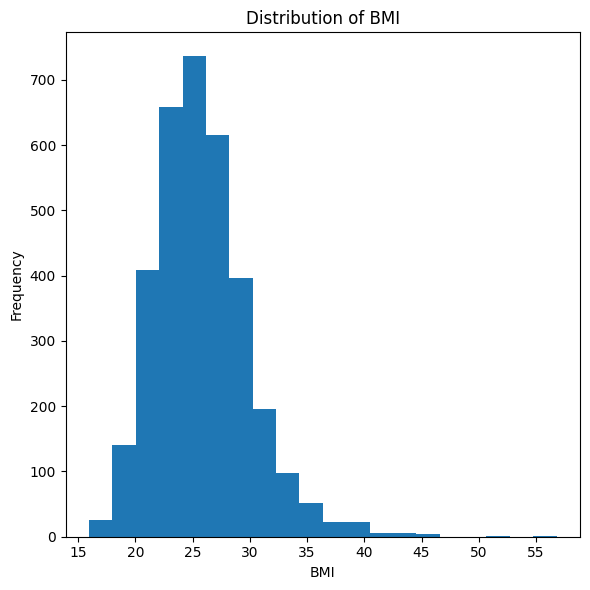

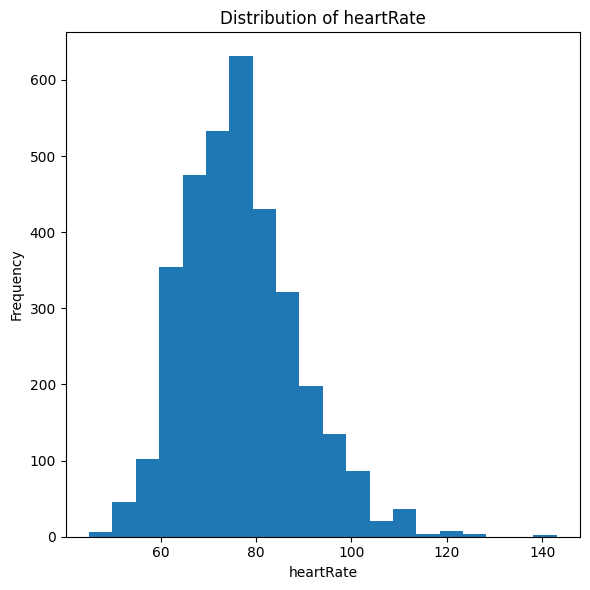

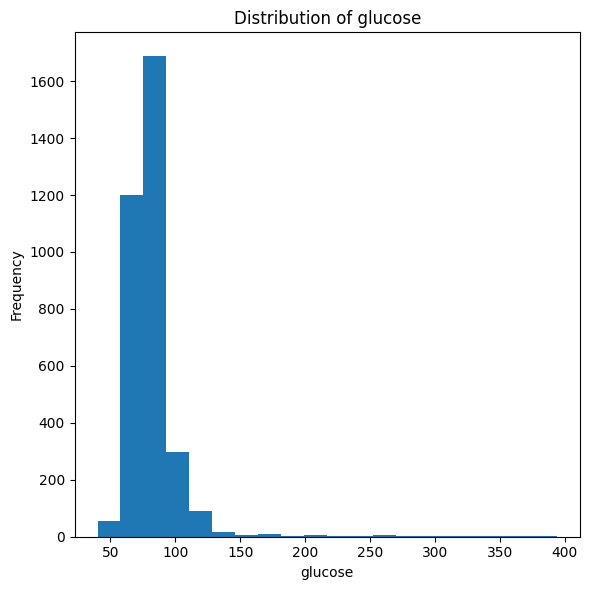

In [15]:
num_features = ['age','cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

for col in num_features:
    plt.figure(figsize=(6, 6))
    plt.hist(data[col], bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# **Outliers check**

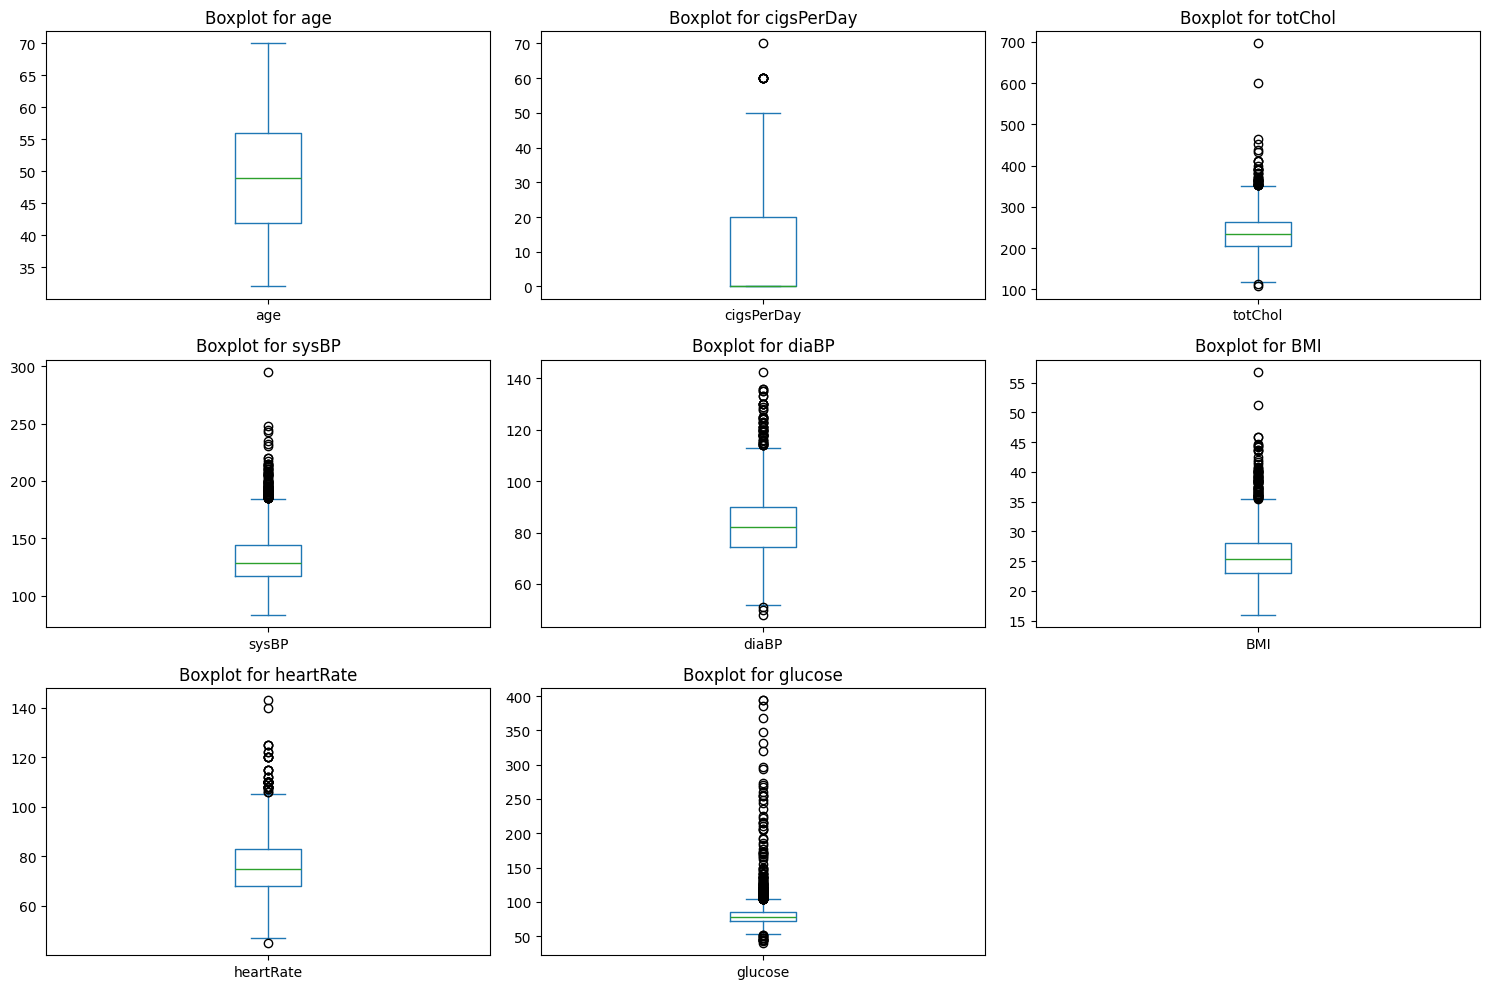

In [16]:
n_cols = 3
n_rows = (len(num_features) // n_cols) + (1 if len(num_features) % n_cols != 0 else 0)
plt.figure(figsize=(15, 10))

for i, col in enumerate(num_features, 1):
    plt.subplot(n_rows, n_cols, i)
    data[col].plot(kind='box')
    plt.title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()

# **Findings**

1. The dataset encompasses an age range of 32 to 72, indicating a population predominantly comprised of middle-aged individuals. This age distribution is significant, as it denotes a crucial phase for evaluating heart disease risk.

2. The maximum count of 1876 corresponds to 0 - 4 cigarettes per day.


# **Categorical Features**

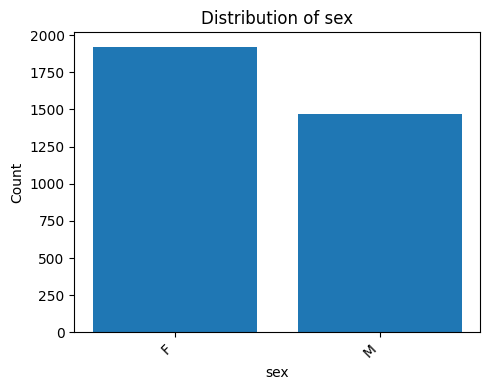

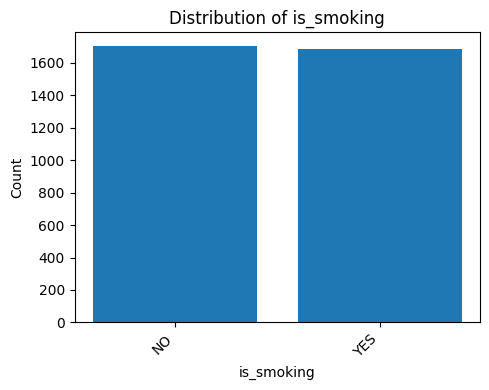

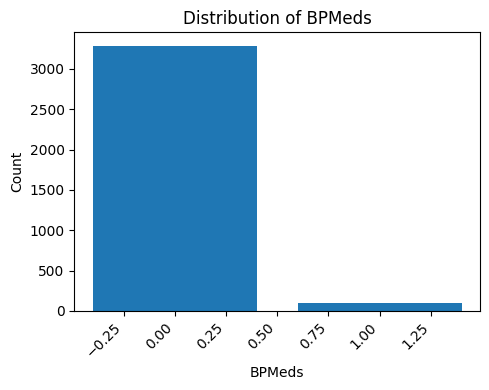

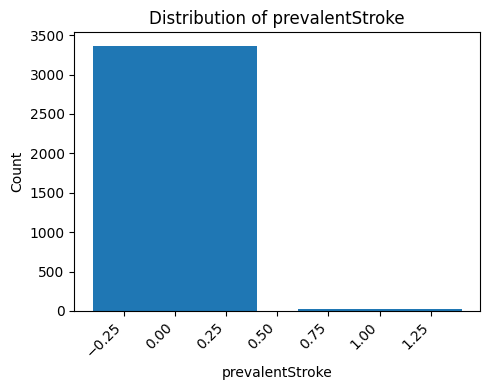

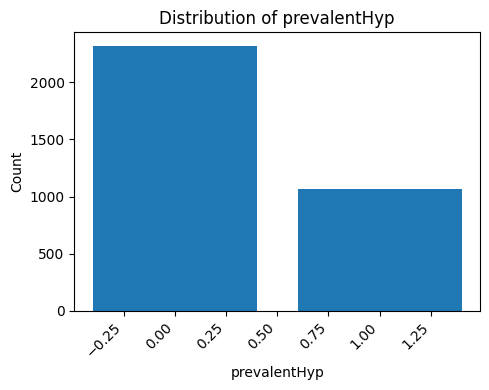

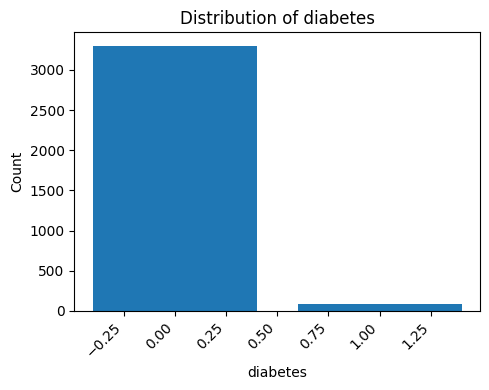

In [17]:
cat_features = ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
for col in cat_features:
    data[col] = data[col].astype('category')

for col in cat_features:
    counts = data[col].value_counts().reset_index()
    counts.columns = [col, 'count']
    plt.figure(figsize=(5,4))
    plt.bar(counts[col], counts['count'])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

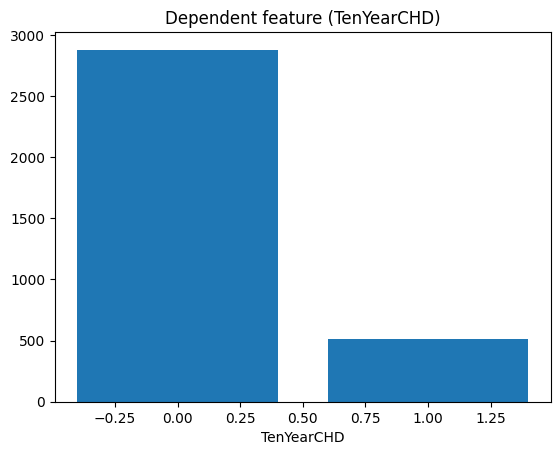

In [18]:
plt.bar(label, value)
plt.xlabel("TenYearCHD")
plt.title("Dependent feature (TenYearCHD)")
plt.show()

# Bivariate



**Numerical Features vs. Target**

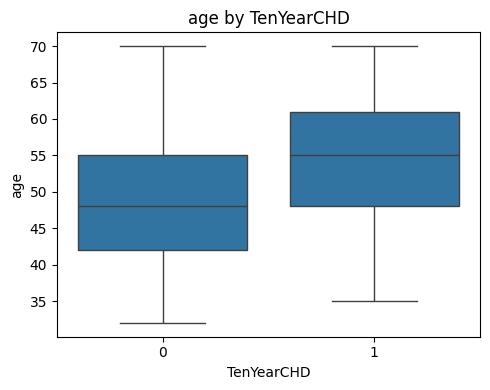

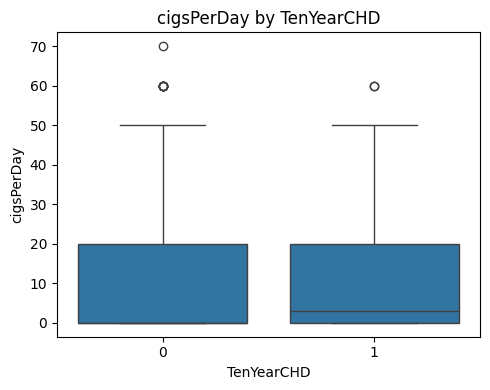

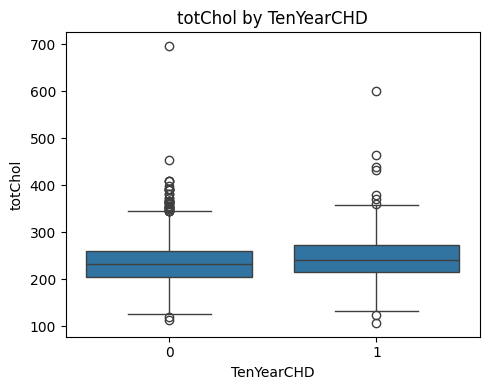

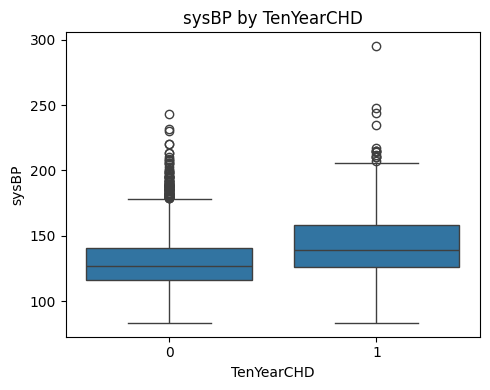

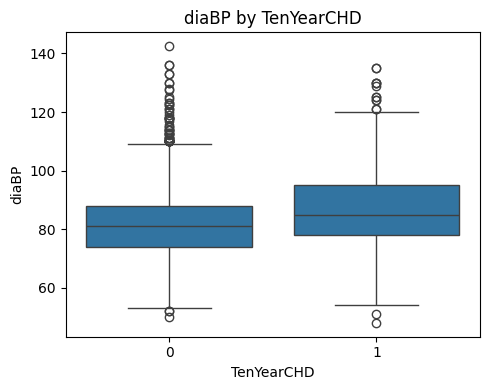

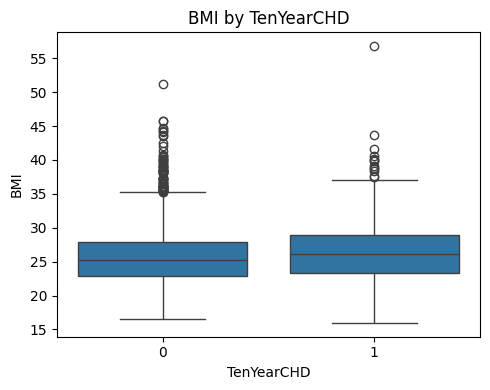

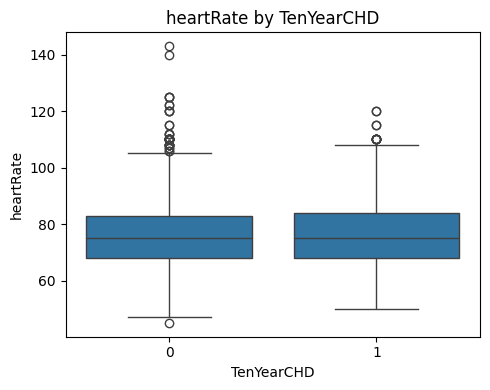

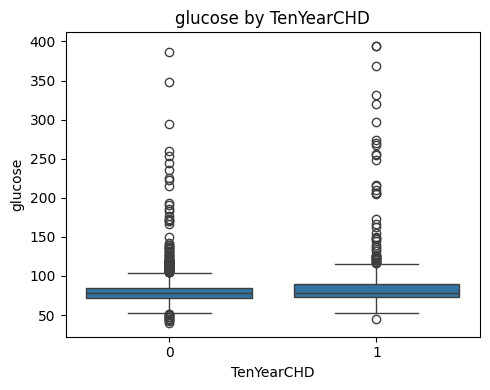

In [19]:
for col in num_features:
    plt.figure(figsize=(5,4))
    sns.boxplot(x='TenYearCHD', y=col, data=data)
    plt.title(f'{col} by TenYearCHD')
    plt.xlabel('TenYearCHD')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# **Summary**

This indicates that older age, higher smoking frequency, high blood pressure, higher cholesterol levels, the presence of hypertension, and raised glucose levels are correlated with a greater 10-year risk of coronary heart disease (TenYearCHD = 1).


# Categorical Features vs. Target

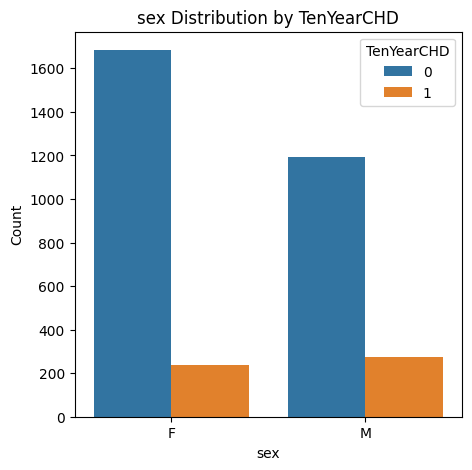

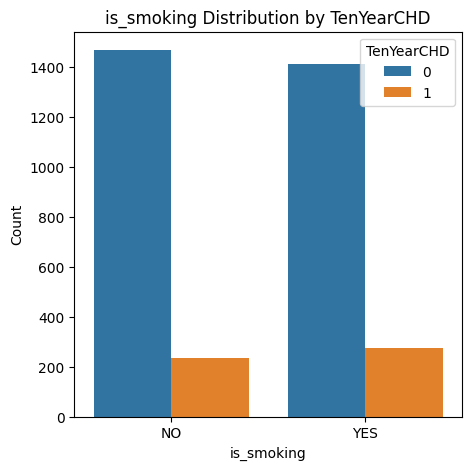

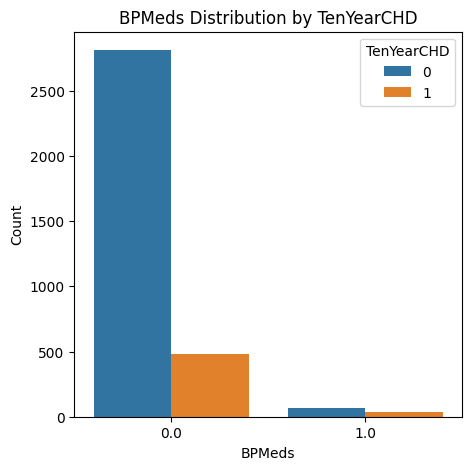

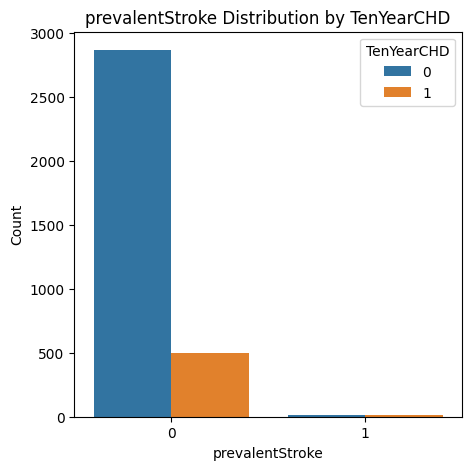

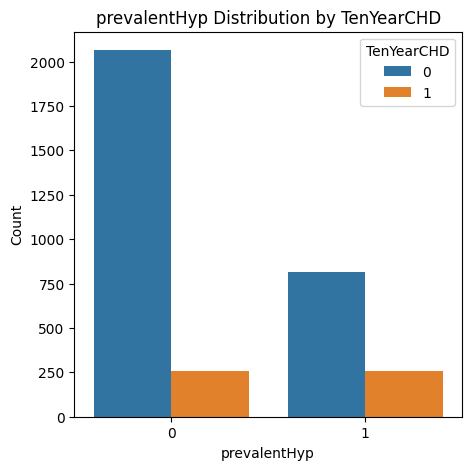

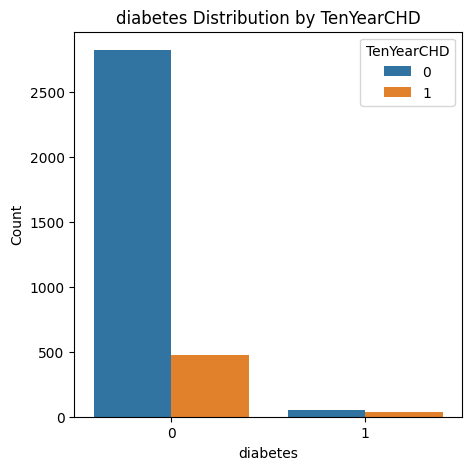

In [20]:
for col in cat_features:
    plt.figure(figsize=(5, 5))
    sns.countplot(x=col, hue='TenYearCHD', data=data)
    plt.title(f'{col} Distribution by TenYearCHD')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# **Correlation**

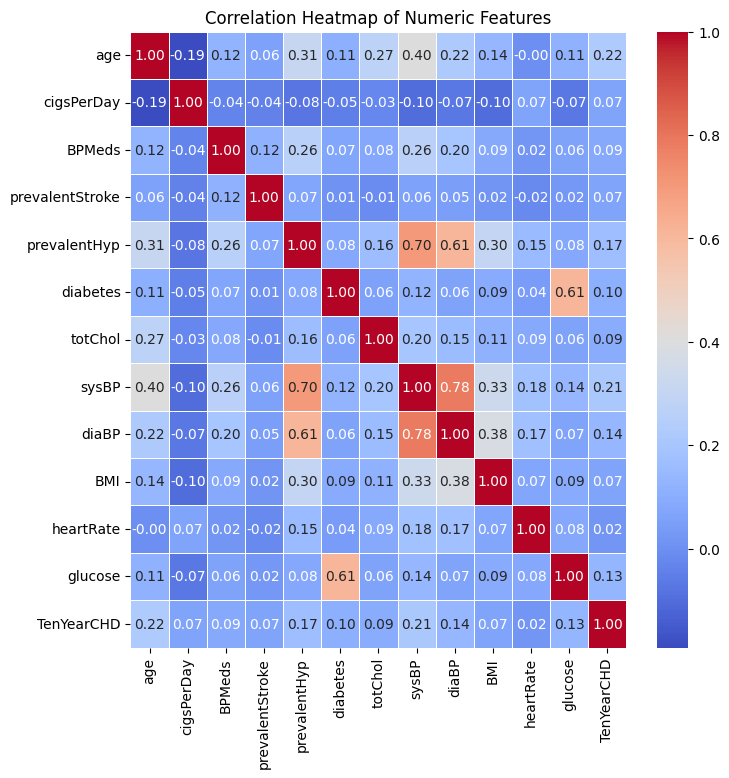

In [21]:
correlation_matrix = data.drop(columns=['sex', 'is_smoking']).corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# **Findings**

I discover that non of the Independent variable have a strong correlation with the risk of having CHD (Heart Disease)

# **Classfication- Machine Learning**

Considering that CHD prediction primarily aims to identify high-risk patients (i.e., maximising true positives), **recall** is the most suitable statistic. **High recall** indicates that the model effectively recognises a greater number of genuine CHD instances, which is essential in health-related predictions, as the repercussions of overlooking a high-risk individual might be significant.



In [22]:
data['sex_encoded'] = data['sex'].map({'F': 0, 'M': 1})
data['is_smoking_encoded'] = data['is_smoking'].map({'NO': 0, 'YES': 1})

In [23]:
scaler = StandardScaler()
numerical_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

Data Split

In [24]:
X = data.drop(columns=['TenYearCHD', 'sex', 'is_smoking'])
y = data['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model

In [25]:
log_reg = LogisticRegression(random_state=42)

log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

Hyperparameter Tuning with Grid Search

To identify the optimal logistic regression hyperparameters, I employed the GridSearchCV.

Finding the optimal value of a model's hyperparameters is the goal of hyperparameter tweaking with Grid Search. Two logistic regression model hyperparameters have their ranges defined by the param_grid


In [26]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}

grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_log_reg = grid_search.best_estimator_

# Model Evaluation

In [27]:
y_pred = best_log_reg.predict(X_test)
y_pred_proba = best_log_reg.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

report = classification_report(y_test, y_pred, target_names=['No CHD (0)', 'CHD (1)'])

print(report)

              precision    recall  f1-score   support

  No CHD (0)       0.86      1.00      0.93       868
     CHD (1)       0.78      0.09      0.17       149

    accuracy                           0.86      1017
   macro avg       0.82      0.54      0.55      1017
weighted avg       0.85      0.86      0.81      1017



In [28]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')

Accuracy: 0.86
Precision: 0.78
Recall: 0.09
F1 Score: 0.17
ROC AUC Score: 0.73


# Adjusting the optimal threshold

In [29]:
y_pred_proba = best_log_reg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

J = tpr - fpr
optimal_idx = J.argmax()
optimal_threshold = thresholds[optimal_idx]

y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred_optimal)
precision = precision_score(y_test, y_pred_optimal)
recall = recall_score(y_test, y_pred_optimal)
f1 = f1_score(y_test, y_pred_optimal)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Optimal Threshold: {optimal_threshold:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

Optimal Threshold: 0.15
Accuracy: 0.69
Precision: 0.27
Recall: 0.67
F1 Score: 0.39
ROC AUC Score: 0.73


In [30]:
report = classification_report(y_test, y_pred_optimal, target_names=['No CHD (0)', 'CHD (1)'])
print(report)

              precision    recall  f1-score   support

  No CHD (0)       0.92      0.69      0.79       868
     CHD (1)       0.27      0.67      0.39       149

    accuracy                           0.69      1017
   macro avg       0.60      0.68      0.59      1017
weighted avg       0.83      0.69      0.73      1017



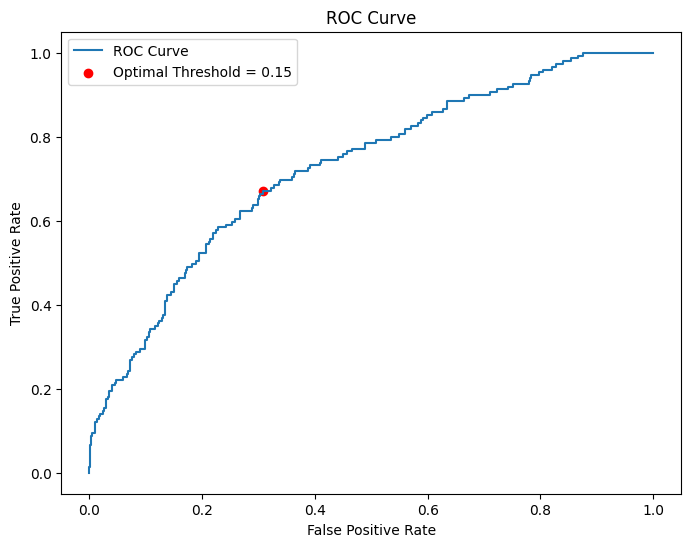

In [31]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

The ROC Curve identifies a threshold that achieves an optimal balance between true positive and false positive rates.

The ideal threshold was determined to be 0.15 and adjusted accordingly.


Data imbalance with SMOTE

In [32]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [33]:
imputer = SimpleImputer(strategy='mean')
X_train_resampled_imputed = imputer.fit_transform(X_train_resampled)
X_train_resampled = pd.DataFrame(X_train_resampled_imputed, columns=X_train.columns)


Training the model

In [34]:
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

y_pred_proba = model.predict_proba(X_test)[:, 1]

def find_optimal_threshold(y_true, y_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    return optimal_threshold


optimal_threshold = find_optimal_threshold(y_test, y_pred_proba)
print(f'Optimal Threshold: {optimal_threshold}')


y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)


accuracy = accuracy_score(y_test, y_pred_optimal)
precision = precision_score(y_test, y_pred_optimal)
recall = recall_score(y_test, y_pred_optimal)
f1 = f1_score(y_test, y_pred_optimal)
roc_auc = roc_auc_score(y_test, y_pred_proba)


print(f'Overall Accuracy: {accuracy:.2f}')
print(f'Overall Precision: {precision:.2f}')
print(f'Overall Recall: {recall:.2f}')
print(f'Overall F1 Score: {f1:.2f}')
print(f'Overall ROC AUC Score: {roc_auc:.2f}')


print("\nClassification Report:")
print(classification_report(y_test, y_pred_optimal, target_names=['No CHD (0)', 'CHD (1)']))

Optimal Threshold: 0.4634839570481487
Overall Accuracy: 0.65
Overall Precision: 0.25
Overall Recall: 0.69
Overall F1 Score: 0.37
Overall ROC AUC Score: 0.71

Classification Report:
              precision    recall  f1-score   support

  No CHD (0)       0.92      0.65      0.76       868
     CHD (1)       0.25      0.69      0.37       149

    accuracy                           0.65      1017
   macro avg       0.59      0.67      0.56      1017
weighted avg       0.83      0.65      0.70      1017



# **Conclusion**

Even while the algorithms' overall accuracy findings are encouraging, there are notable differences in how well they can detect people with congenital heart disease. The baseline model, despite its elevated accuracy, has difficulties in accurately classifying positive cases, resulting in a diminished recall for CHD.

To resolve this issue, methods including threshold optimisation and SMOTE has been utilised. The optimised threshold model significantly enhanced recall for CHD, but at the expense of diminished precision. Conversely, SMOTE significantly improved recollection while preserving a satisfactory equilibrium between precision and recall.

Although these strategies demonstrate potential, additional investigation is required to enhance the model's efficacy. This may entail experimenting with more sophisticated models, such as Random Forest or Gradient Boosting, or utilising advanced feature engineering methodologies. The particular clinical setting as well as the relative significance of recall and precision in reaching a correct diagnosis should also be carefully taken into account.

In the end, the goal is to find a good balance between sensitivity and specificity so that the model can accurately find people who are at risk for coronary heart disease while also reducing the number of false positives.
